## Loading libraries, data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [2]:
loan_df = pd.read_csv('train.csv',delimiter=',')

In [3]:
loan_df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,01-03-2012,May-12,95,1,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,01-01-2012,Mar-12,72,1,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,01-01-2012,Mar-12,49,1,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,01-02-2012,Apr-12,46,2,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,01-02-2012,Apr-12,80,1,...,3,4,5,6,7,8,9,10,11,1


#### Dropping some columns which are not going to make substantial impact on the final output.

In [4]:
def drop_cols(df,*args):
    df.drop([cols for cols in args],axis=1,inplace=True)
    
def plot_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(16,16))
    sns.heatmap(corr, annot=True,fmt='.4f')
    plt.show()

In [5]:
drop_cols(loan_df,'origination_date','first_payment_date','loan_id','financial_institution')

In [6]:
loan_df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,4.250,214000,360,95,1,22,694,C86,30,...,0,0,0,1,0,0,0,0,0,1
1,Y,4.875,144000,360,72,1,44,697,B12,0,...,0,0,0,0,0,0,0,1,0,1
2,Z,3.250,366000,180,49,1,33,780,B12,0,...,0,0,0,0,0,0,0,0,0,1
3,X,4.750,135000,360,46,2,44,633,B12,0,...,0,0,0,0,0,1,1,1,1,1
4,X,4.750,124000,360,80,1,43,681,C86,0,...,3,4,5,6,7,8,9,10,11,1


#### After analysing I see data points m1 - m12 can be replaced with one column. 

In [7]:
monthly_loan_data = loan_df.loc[:,['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]

In [8]:
monthly_loan_data.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,1,1
4,0,1,2,3,4,5,6,7,8,9,10,11


In [9]:
col = list(monthly_loan_data.columns)

monthly_loan_data[col] = np.where(monthly_loan_data[col]>1,1,monthly_loan_data[col])

In [10]:
monthly_loan_data['m_sum'] = monthly_loan_data.sum(axis=1)

In [11]:
monthly_loan_data.head(10)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m_sum
0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,1,1,4
4,0,1,1,1,1,1,1,1,1,1,1,1,11
5,1,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,1,0,1,1,0,1,5
9,0,0,0,0,0,1,1,1,1,1,1,1,7


In [12]:
loan_df['m_sum'] = monthly_loan_data['m_sum']

In [13]:
drop_cols(loan_df,'m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12')

In [14]:
loan_df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m13,m_sum
0,Z,4.250,214000,360,95,1,22,694,C86,30,0,0,1,1
1,Y,4.875,144000,360,72,1,44,697,B12,0,0,0,1,1
2,Z,3.250,366000,180,49,1,33,780,B12,0,0,0,1,0
3,X,4.750,135000,360,46,2,44,633,B12,0,638,0,1,4
4,X,4.750,124000,360,80,1,43,681,C86,0,0,0,1,11


In [15]:
loan_df['insurance_type'].value_counts()

0    115680
1       378
Name: insurance_type, dtype: int64

#### Converting categorical to numerical columns
we are using get dummies so that there is no discrimination of numbers which we have in Label encoding.

In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 14 columns):
source                      116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null int64
debt_to_income_ratio        116058 non-null int64
borrower_credit_score       116058 non-null int64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null int64
co-borrower_credit_score    116058 non-null int64
insurance_type              116058 non-null int64
m13                         116058 non-null int64
m_sum                       116058 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 12.4+ MB


In [17]:
#loan_df[] = pd.get_dummies(loan_df, columns=['source', 'loan_purpose']).head() # this was generating nan

# Create dummy variables for 2 columns
df_source = pd.get_dummies(loan_df['source'])
df_loan_purpose = pd.get_dummies(loan_df['loan_purpose'])
loan_df = pd.concat([loan_df, df_source, df_loan_purpose], axis=1)

#### Chekcing the relation in data using Heatmap

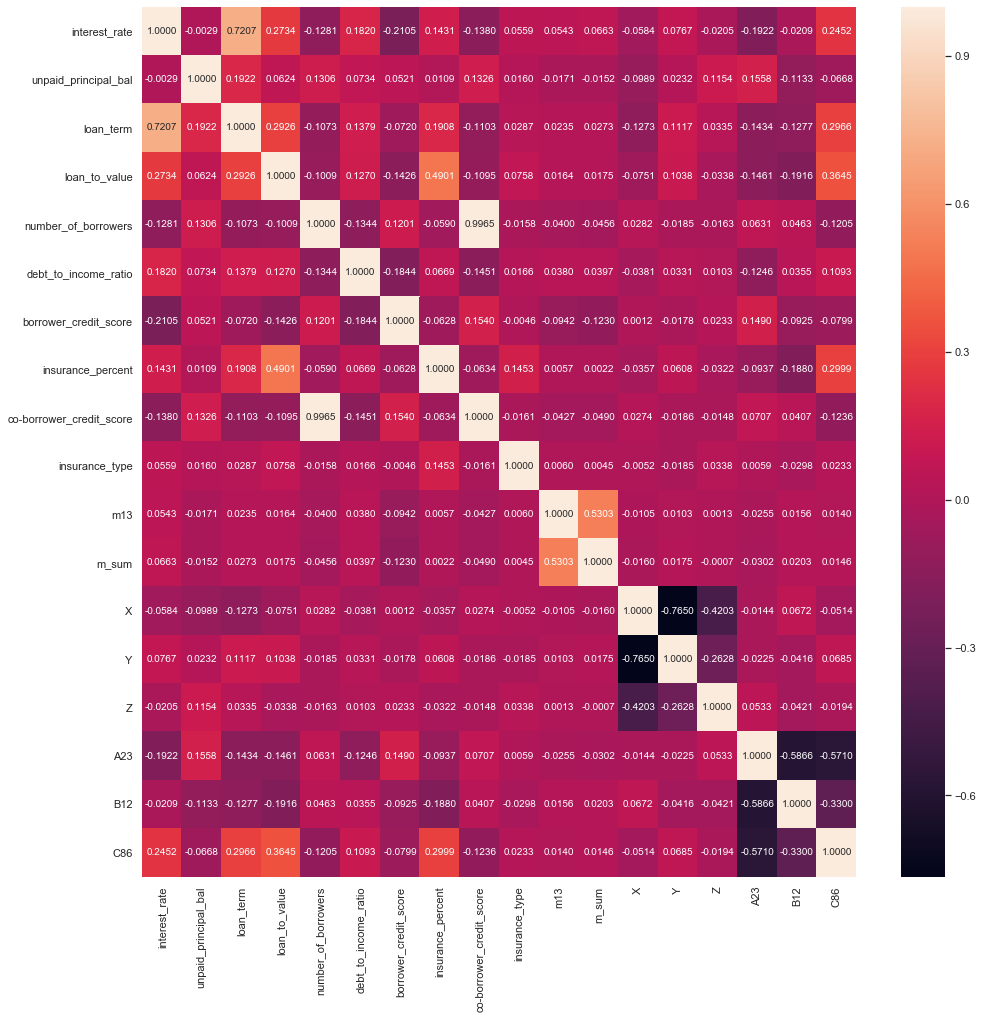

In [18]:
plot_heatmap(loan_df)

In [19]:
loan_df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m13,m_sum,X,Y,Z,A23,B12,C86
0,Z,4.250,214000,360,95,1,22,694,C86,30,0,0,1,1,0,0,1,0,0,1
1,Y,4.875,144000,360,72,1,44,697,B12,0,0,0,1,1,0,1,0,0,1,0
2,Z,3.250,366000,180,49,1,33,780,B12,0,0,0,1,0,0,0,1,0,1,0
3,X,4.750,135000,360,46,2,44,633,B12,0,638,0,1,4,1,0,0,0,1,0
4,X,4.750,124000,360,80,1,43,681,C86,0,0,0,1,11,1,0,0,0,0,1


In [20]:
drop_cols(loan_df,'number_of_borrowers','insurance_percent','insurance_type','source','loan_purpose','Z')

In [21]:
loan_df.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,co-borrower_credit_score,m13,m_sum,X,Y,A23,B12,C86
0,4.250,214000,360,95,22,694,0,1,1,0,0,0,0,1
1,4.875,144000,360,72,44,697,0,1,1,0,1,0,1,0
2,3.250,366000,180,49,33,780,0,1,0,0,0,0,1,0
3,4.750,135000,360,46,44,633,638,1,4,1,0,0,1,0
4,4.750,124000,360,80,43,681,0,1,11,1,0,0,0,1


#### Check if data is having any imbalance

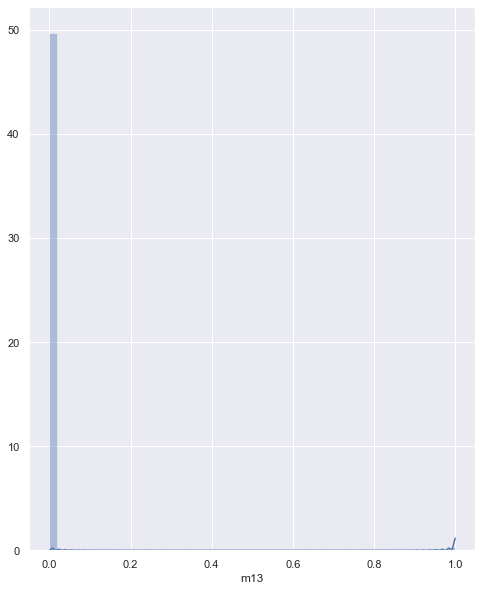

In [22]:
f,ax=plt.subplots(figsize=(8,10))
sns.distplot(loan_df['m13'])

#### Here we can see whole data is for zero (Approx).

In [23]:
print(loan_df['m13'].value_counts())
print()
print(loan_df['m13'].value_counts(normalize=True)*100)

0    115422
1       636
Name: m13, dtype: int64

0    99.451998
1     0.548002
Name: m13, dtype: float64


## Splitting the data

In [24]:
def splitting_data(loan_df):
    X = loan_df.drop(['m13'],axis=1)
    Y = loan_df['m13']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y)
    return X_train, X_test, y_train, y_test

In [25]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,mean_squared_error

#### Trying some methods when we have imbalenced data.

In [26]:
def fit_result():
    model.fit(X_train,y_train)
    y_pred_class = model.predict(X_test)
    print('Accuracy_score : ',accuracy_score(y_test, y_pred_class))
    print('ROC_AUC_score : ',roc_auc_score(y_test, y_pred_class))
    print('confusion_matrix : \n\n',confusion_matrix(y_test, y_pred_class))
    print('Classification_report\n',classification_report(y_test, y_pred_class))

In [27]:
X_train, X_test, y_train, y_test = splitting_data(loan_df)

## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
fit_result()

Accuracy_score :  0.995562640013786
ROC_AUC_score :  0.6532184207968156
confusion_matrix : 

 [[23070    15]
 [   88    39]]
Classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23085
           1       0.72      0.31      0.43       127

    accuracy                           1.00     23212
   macro avg       0.86      0.65      0.71     23212
weighted avg       0.99      1.00      0.99     23212



#### Recall,f1-score is very low.

## Xgboost

In [29]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [30]:
model.fit(X_train,y_train)

preds = model.predict(X_test)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.185956


#### Up sampling the data which is having less %

In [32]:
from sklearn.utils import resample

In [33]:
loan_zeros = loan_df[loan_df['m13']==0]
loan_ones = loan_df[loan_df['m13']==1]
 
# Upsample minority class
df_upsampled_ones = resample(loan_ones,replace=True,n_samples=115422,random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
loan_df_upsampled = pd.concat([loan_zeros, df_upsampled_ones])
 
# Display new class counts
loan_df_upsampled['m13'].value_counts()

1    115422
0    115422
Name: m13, dtype: int64

#### RandomForestClassifier after up sampling

In [34]:
X_train, X_test, y_train, y_test = splitting_data(loan_df_upsampled)
X_train.shape

(184675, 13)

In [35]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
fit_result()

Accuracy_score :  0.999415192011956
ROC_AUC_score :  0.9994151793450008
confusion_matrix : 

 [[23057    27]
 [    0 23085]]
Classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23084
           1       1.00      1.00      1.00     23085

    accuracy                           1.00     46169
   macro avg       1.00      1.00      1.00     46169
weighted avg       1.00      1.00      1.00     46169



# Prediction on testing data

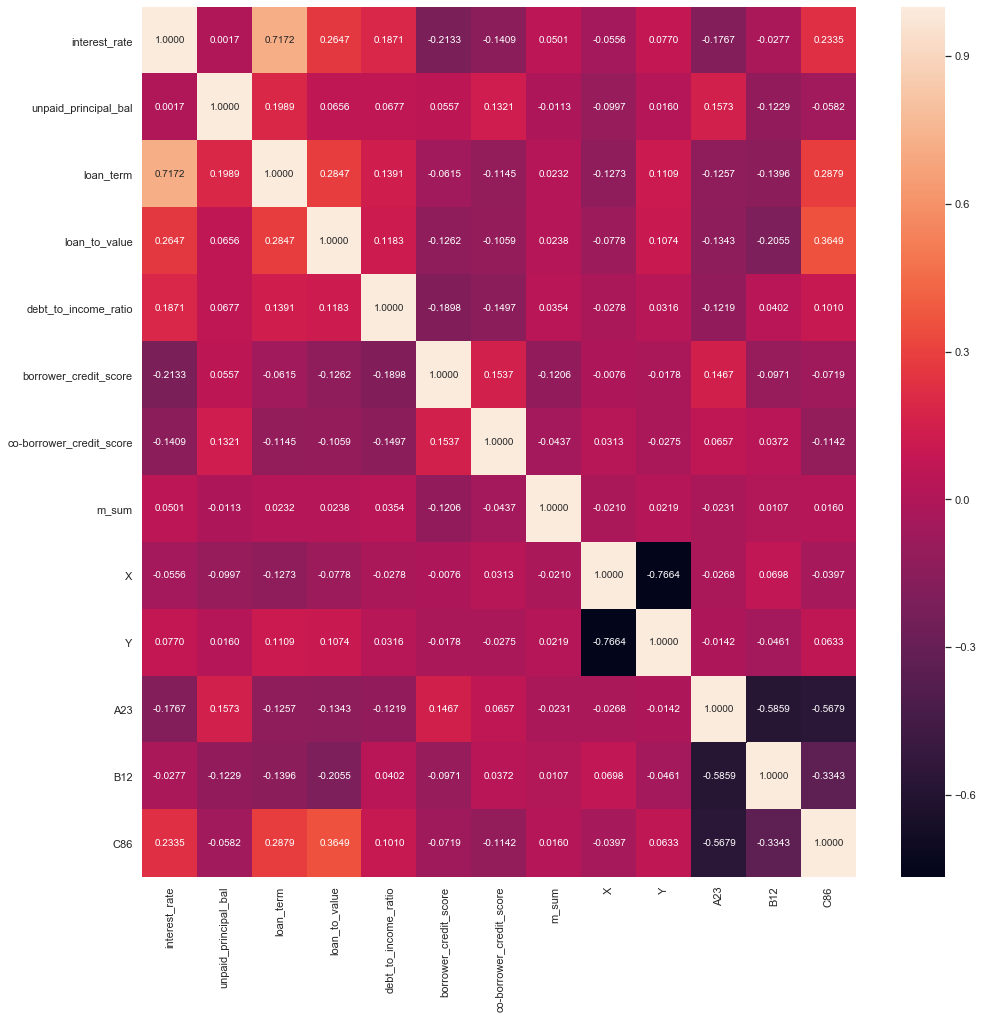

In [36]:
test_loan_df = pd.read_csv('test.csv',delimiter=',')

drop_cols(test_loan_df,'origination_date','first_payment_date','loan_id','financial_institution')

test_loan_df.head()

monthly_loan_test_data = test_loan_df.loc[:,['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]

col = list(monthly_loan_test_data.columns)

monthly_loan_test_data[col] = np.where(monthly_loan_test_data[col]>1,1,monthly_loan_test_data[col])

monthly_loan_test_data['m_sum'] = monthly_loan_test_data.sum(axis=1)

monthly_loan_test_data.head(10)

test_loan_df['m_sum'] = monthly_loan_test_data['m_sum']

drop_cols(test_loan_df,'m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12')

test_loan_df.head()

#test_loan_df[] = pd.get_dummies(test_loan_df, columns=['source', 'loan_purpose']).head() # this was generating nan

# Create dummy variables for 2 columns
df_source = pd.get_dummies(test_loan_df['source'])
df_loan_purpose = pd.get_dummies(test_loan_df['loan_purpose'])
test_loan_df = pd.concat([test_loan_df, df_source, df_loan_purpose], axis=1)

drop_cols(test_loan_df,'number_of_borrowers','insurance_percent','insurance_type','source','loan_purpose','Z')

plot_heatmap(test_loan_df)

In [37]:
results  = model.predict(test_loan_df)
results

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
test_loan_df = pd.read_csv('test.csv',delimiter=',')

id_values = test_loan_df['loan_id'].values
id_values

array([    1,     2,     3, ..., 35864, 35865, 35866], dtype=int64)

In [39]:
df = pd.DataFrame({'loan_id':id_values, 'm13':results})

In [40]:
df.to_csv('my_final_submission.csv',index=False)